In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline

In [2]:
data = pd.read_csv("../data/Kourkchi-Tully-Groups.csv")

In [3]:
data[0:10]

,pgc,Name,RA,DE,GLong,GLat,SGL,SGB,Ty,B_t,...,geD,gsigL,gsigV,gR2t,gRdyn,gMassL,gMassdyn,SGX,SGY,SGZ
0,35,UGC12894,0.0938,39.4955,112.3102,-22.3207,333.3464,20.3429,9.9,15.89,...,0,21,0,0.057,NaN,10.276,NaN,6.90,-3.47,2.86
1,38,UGC12893,0.1188,17.2203,105.9151,-43.9611,310.0185,17.2726,8.4,15.14,...,0,30,0,0.081,NaN,10.724,NaN,10.95,-13.05,5.30
2,43,ESO293-027,0.1229,-40.4844,337.9255,-72.9984,254.1104,-0.1850,4.0,13.25,...,0,53,0,0.145,NaN,11.484,NaN,-11.49,-40.36,-0.14
3,143,WLM,0.4926,-15.4609,75.8635,-73.6245,277.8077,8.0860,9.9,10.01,...,5,23,0,0.061,NaN,10.362,NaN,0.13,-0.94,0.14
4,156,IC5377,0.5224,16.5903,106.1972,-44.6719,309.4554,16.7666,9.9,14.96,...,8,116,92,0.315,0.245,12.498,12.272,6.06,-7.36,2.87
5,171,UGC12921,0.5877,77.2569,120.1543,14.6507,13.3827,18.2069,4.6,13.60,...,0,76,0,0.207,NaN,11.950,NaN,33.21,7.90,11.23
6,181,ESO012-014,0.6766,-80.3482,305.4559,-36.5399,216.1117,-13.3206,9.0,13.72,...,25,36,0,0.097,NaN,10.963,NaN,-9.54,-6.96,-2.79
7,187,ESO149-013,0.6945,-52.7716,319.1268,-62.7997,242.7092,-4.8174,9.9,14.69,...,0,30,0,0.082,NaN,10.737,NaN,-8.20,-15.89,-1.51
8,218,NGC7814,0.8121,16.1456,106.4089,-45.1746,309.0614,16.4026,2.0,10.96,...,8,116,92,0.315,0.245,12.498,12.272,8.73,-10.76,4.08
9,255,UGC00017,0.9302,15.2182,106.2149,-46.0989,308.1422,16.0958,9.1,14.60,...,8,116,92,0.315,0.245,12.498,12.272,11.52,-14.67,5.38


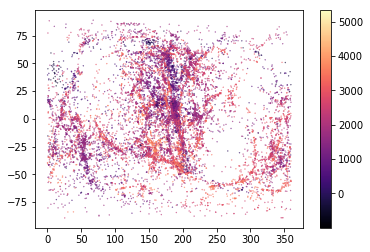

In [4]:
plt.scatter(data['RA'], data['DE'], s=0.1, c=data['Vhel'], cmap='magma')
plt.colorbar()

[     35      38      43 ... 9002677 9002799 9002824]


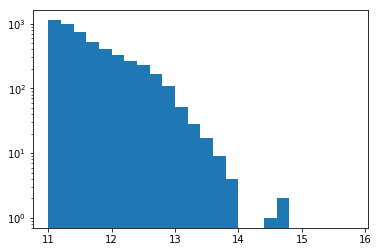

In [8]:
unique_groups = np.unique(data['PGC1'])
center_group = np.in1d(data['pgc'], unique_groups)
group_data = data[center_group]
print(unique_groups)
a= plt.hist(group_data['gMassL'], np.arange(11,16.0,0.2), log=True)

From the documentation

PGC1	: `PGC identification of brightest member of group`

PGC1+	: `PGC identification of brightest member of association`

In [12]:
#finds the elements that are in an association with a brighter group

in_association = group_data['PGC1']!=group_data['PGC1+']
print('groups in associations:', np.count_nonzero(in_association))
print('number of associations:', len(np.unique(group_data['PGC1+'][in_association])))

# The associations might be groups around a big cluster.
# Here we count how many times a bright group is considered 
# to be in an association.
# We only keep the PGC of the bright groups that are 
# considered only once to be in an association by a fainter group.
counts = dict(Counter(group_data['PGC1+'][in_association]))
pgc_dominant_in_pair = []
for k in counts.keys():
    if counts[k]==1:
        pgc_dominant_in_pair.append(k)

print("Total number of associations with two groups:", len(pgc_dominant_in_pair))
ii = np.in1d(group_data['pgc'], pgc_dominant_in_pair)
group_M31 = group_data[ii]
group_M31 = group_M31.sort_values('pgc')
print(len(group_M31))

ii = np.in1d(group_data['PGC1+'][in_association], pgc_dominant_in_pair)
tmp = group_data[in_association]
group_MW = tmp[ii]
group_MW = group_MW.sort_values('PGC1+')
print(len(group_MW))

groups in associations: 3913
number of associations: 885
Total number of associations with two groups: 482
482
482


In [14]:
print(group_M31[['pgc', 'PGC1', 'PGC1+']][0:10])
print(group_MW[['pgc', 'PGC1', 'PGC1+']][0:10])

     pgc  PGC1  PGC1+
11   279   279    279
20   474   474    474
26   591   591    591
31   660   660    660
37   757   757    757
54  1130  1130   1130
55  1160  1160   1160
60  1284  1284   1284
72  1518  1518   1518
83  1750  1750   1750
           pgc     PGC1  PGC1+
11631  1620667  1620667    279
38         800      800    474
0           35       35    591
19         446      446    660
11506  1409128  1409128    757
57        1218     1218   1130
52        1107     1107   1160
10141   240489   240489   1284
10424   677265   677265   1518
90        1835     1835   1750


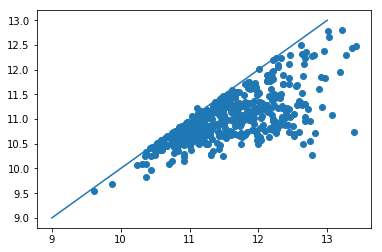

In [22]:
plt.scatter(group_M31['gMassL'], group_MW['gMassL'])
x = np.linspace(9,13.0, 100)
plt.plot(x,x)

standard deviation in the velocity difference 205.9734461605058


(-250, 250)

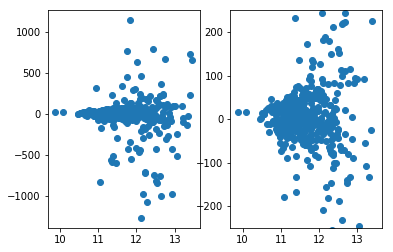

In [37]:
plt.subplot(1,2,1)
plt.scatter(np.log10(10**group_M31['gMassL'].values+10**group_MW['gMassL'].values), 
            group_M31['Vhel'].values-group_MW['Vhel'].values)

plt.subplot(1,2,2)
plt.scatter(np.log10(10**group_M31['gMassL'].values+10**group_MW['gMassL'].values), 
            group_M31['Vhel'].values-group_MW['Vhel'].values)
velocity_difference = group_M31['Vhel'].values-group_MW['Vhel'].values
print('standard deviation in the velocity difference', np.std(velocity_difference))
plt.ylim(-250,250)
#x = np.linspace(9,13.0, 100)
#plt.plot(x,x)

2 LG like pairs
mean -17.11 std 205.97
mean -2.00 std 23.00


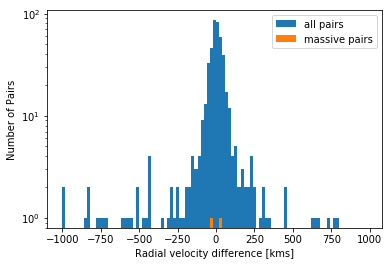

In [98]:
vel_diff = group_M31['Vhel'].values- group_MW['Vhel'].values
distance = (group_M31['SGX'].values - group_MW['SGX'].values)**2
distance += (group_M31['SGY'].values - group_MW['SGY'].values)**2
distance += (group_M31['SGZ'].values - group_MW['SGZ'].values)**2
distance = np.sqrt(distance)
ii = (group_M31['gMassL'].values>12.0) & (group_MW['gMassL'].values>12.0) & (distance<1.0)
print(np.count_nonzero(ii), 'LG like pairs')


a = plt.hist(vel_diff, bins=np.arange(-1000,1000,20), log=True, label='all pairs')
a = plt.hist(vel_diff[ii], bins=np.arange(-1000,1000,20), log=True, label='massive pairs')

plt.xlabel('Radial velocity difference [kms]')
plt.ylabel('Number of Pairs')
print('mean {:.2f} std {:.2f}'.format(np.mean(vel_diff), np.std(vel_diff)))
print('mean {:.2f} std {:.2f}'.format(np.mean(vel_diff[ii]), np.std(vel_diff[ii])))
plt.legend()

2


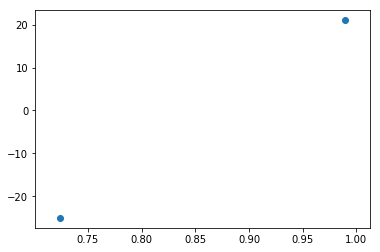

In [99]:
plt.scatter(distance[ii], vel_diff[ii])
print(np.count_nonzero(distance[ii]<6.0))

In [100]:
nameM31 = group_M31['pgc'][ii]
nameMW = group_MW['pgc'][ii]
vhelM31 = group_M31['Vhel'][ii]
vdiff = vel_diff[ii]
dist = distance[ii]
print(len(dist))
for a, b, v_diff, r in zip(nameM31,nameMW, vdiff, distance):
    if(r<1):
        print(a,b,v_diff, r)

2
166290 2807096 21 0.3801315561749636
2807083 2807084 -25 0.4406812907306137


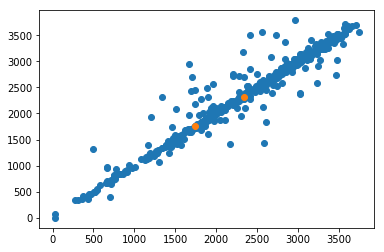

In [101]:
plt.scatter(group_M31['Vhel'], group_MW['Vhel'])
plt.scatter(group_M31['Vhel'][ii], group_MW['Vhel'][ii])
